In [25]:
"""
M4 DATASET

download manualy from kaggle and unpack
hourly data contains 245 timeseries with 960 datapoint and
260 timeseries with 169 nans at the end --> 700 datapoints


we load hourly train and test data for m4
- train is shortened to 700 to remove NANs
- some timeseries are removed for electricity prediction to 348 / training for electricity
- test does not contain NANs
- test timeseries are tropped to fit the same 348 model
- TODO maybe still need to transpose
"""
import pandas as pd
kaggle_m4_link = "https://www.kaggle.com/datasets/yogesh94/m4-forecasting-competition-dataset"

m4_hourly_train = pd.read_csv("/home/ben_ten/ben/MA/datasets/m4/Hourly-train.csv")
m4_hourly_test = pd.read_csv("/home/ben_ten/ben/MA/datasets/m4/Hourly-test.csv")

m4_hourly_no_nan_train = m4_hourly_train.iloc[:349, :701]
m4_hourly_no_nan_test = m4_hourly_test.iloc[:349, :]

In [5]:
%pip install --upgrade pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
"""
Electric grid system dataset
paper = file:///C:/Users/Benedikt/Desktop/Mein_Ordner/WI-INFO/Semester_6/MA/s41597-022-01455-7.pdf
- use Deep NN with minute input, this is too small
- only pre-normalized values, does not work for my research

"""

'\nElectric grid system dataset\npaper = file:///C:/Users/Benedikt/Desktop/Mein_Ordner/WI-INFO/Semester_6/MA/s41597-022-01455-7.pdf\n- use Deep NN with minute input, this is too small\n- only pre-normalized values, does not work for my research\n\n'

/home/ben_ten/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


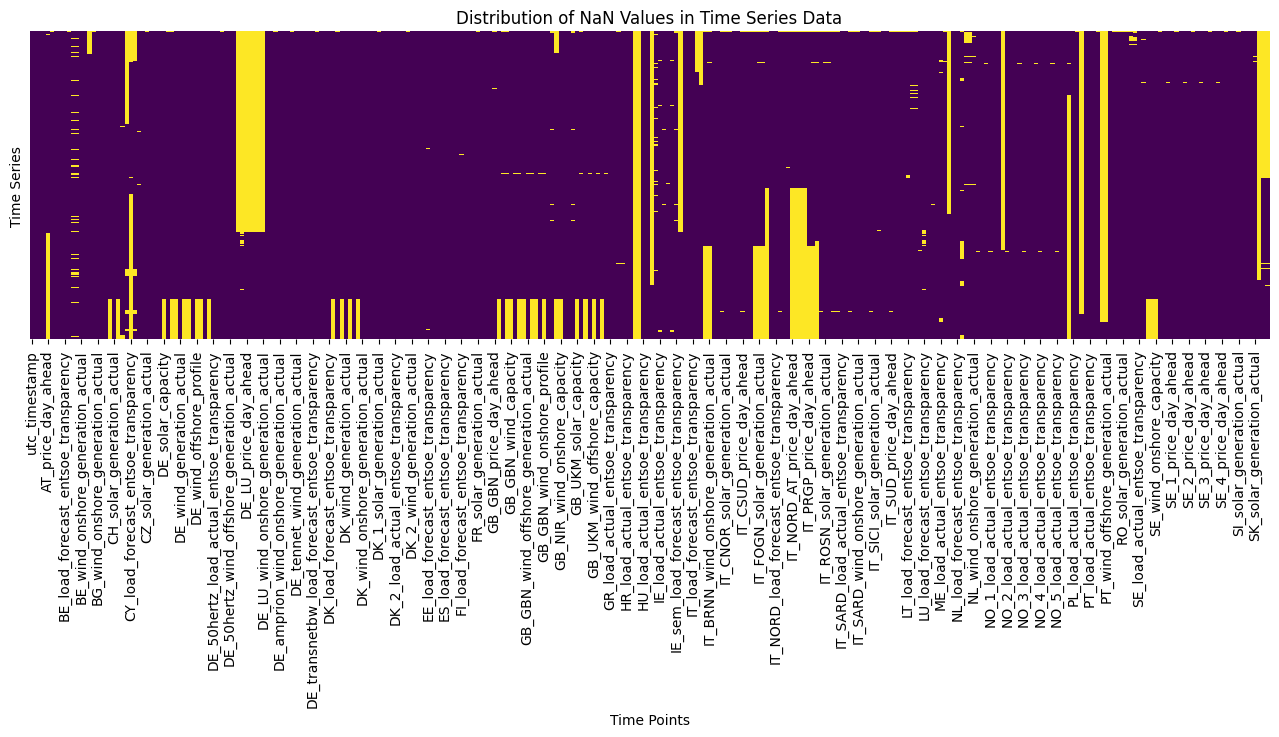

In [1]:
"""
europe electricity data
jupyterNB for explanation: https://nbviewer.org/github/Open-Power-System-Data/datapackage_timeseries/blob/2020-10-06/main.ipynb
- 50k entries
- 300 variates
- countries have different variates as some dont have wind/offshore or some NANs

"""
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("/home/ben_ten/ben/MA/datasets/electricity_europe/time_series_60min_singleindex.csv")
#df.describe()

def visualize_nans(df):
	# Create a heatmap to visualize the distribution of NaN values after removing some
	nan_counts = df.isna().sum()

	plt.figure(figsize=(16, 4))
	sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
	plt.xlabel('Time Points')
	plt.ylabel('Time Series')
	plt.title('Distribution of NaN Values in Time Series Data')
	plt.show()
visualize_nans(df)

In [2]:
df

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30T19:00:00Z,2020-09-30T21:00:00+0200,6661.0,6656.0,NaN,NaN,1847.0,9402.0,9720.0,NaN,...,1506.95,1530.0,5.32,0.44,3324.0,3170.0,1.7,1.1,NaN,NaN
50397,2020-09-30T20:00:00Z,2020-09-30T22:00:00+0200,6336.0,6310.0,NaN,NaN,1723.0,9219.0,9418.0,NaN,...,1391.15,1388.0,5.57,0.62,3099.0,3010.0,1.7,1.0,NaN,NaN
50398,2020-09-30T21:00:00Z,2020-09-30T23:00:00+0200,5932.0,5813.0,NaN,NaN,1771.0,8763.0,8873.0,NaN,...,1250.17,1274.0,5.58,0.66,2940.0,2890.0,1.6,1.0,NaN,NaN
50399,2020-09-30T22:00:00Z,2020-10-01T00:00:00+0200,5628.0,5424.0,NaN,NaN,1779.0,8131.0,8285.0,NaN,...,1206.82,1178.0,5.61,0.21,2823.0,2740.0,1.7,1.2,NaN,NaN


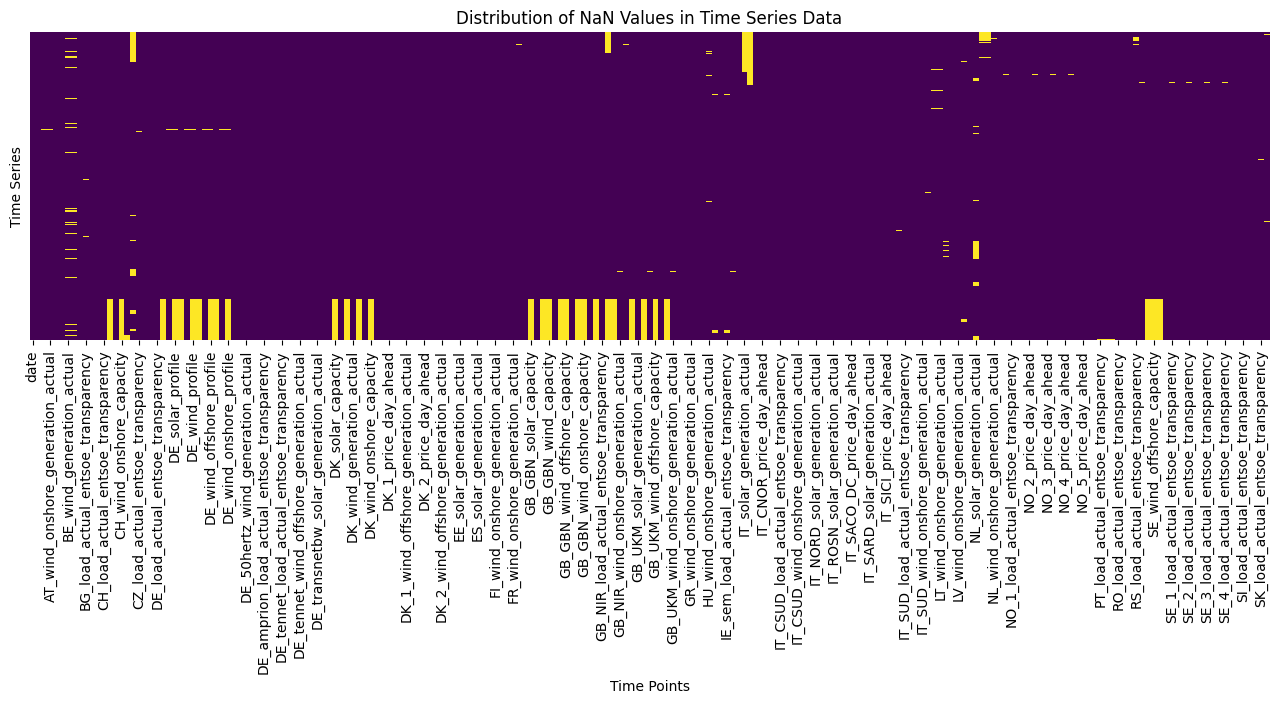

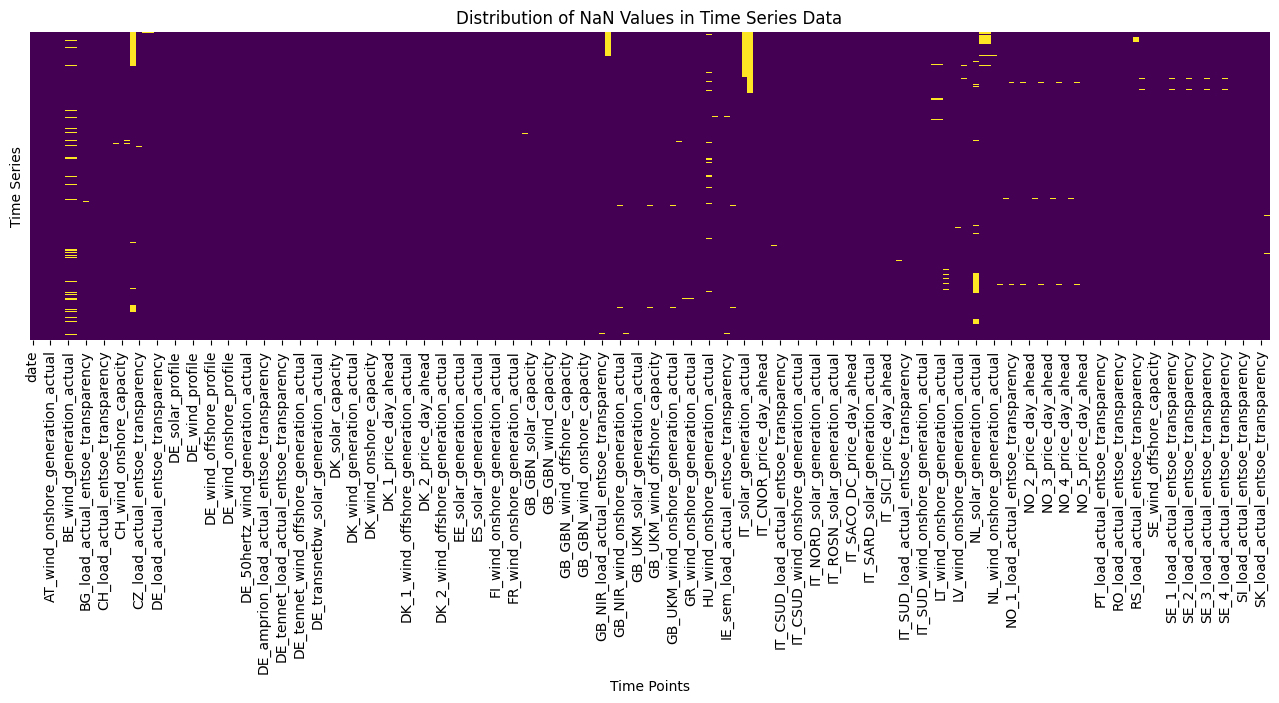

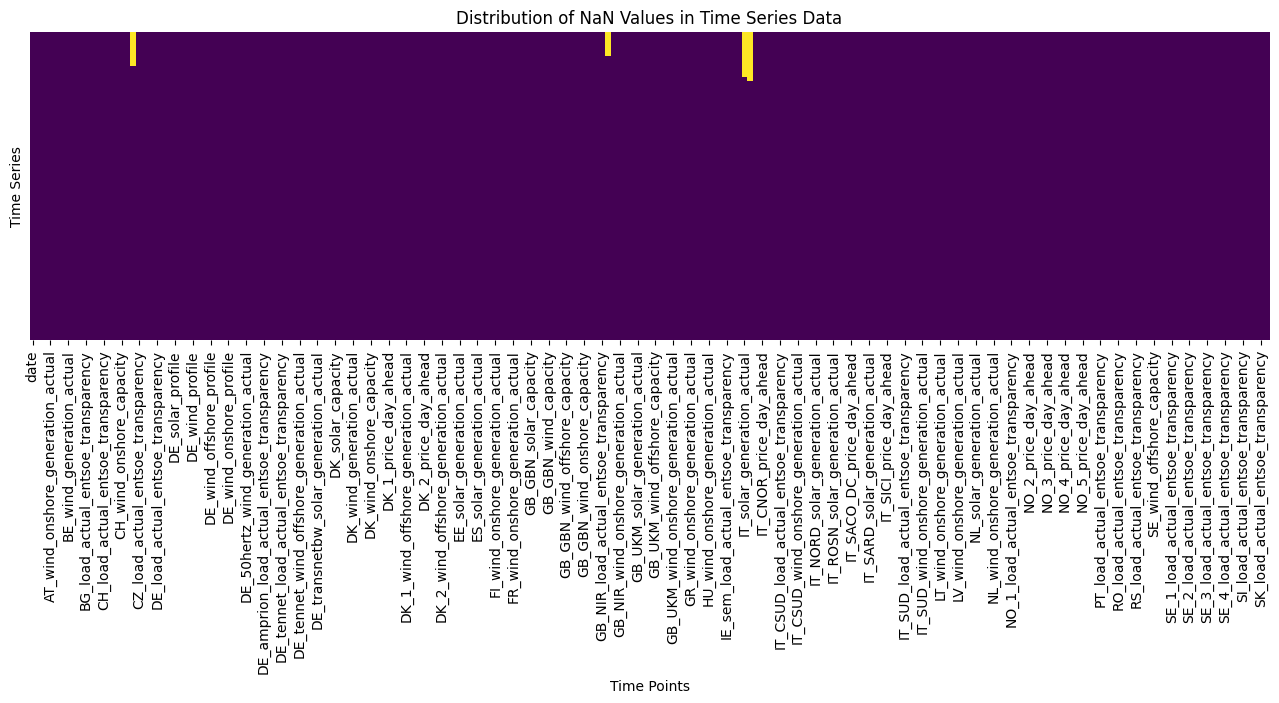

In [3]:
# drop second timestamp column
df = df.drop('cet_cest_timestamp', axis=1)

# rename to fit DataSetClass
df.rename(columns={'utc_timestamp': 'date'}, inplace=True)


# drop forecast because its synthetic data
columns_to_delete = ['forecast']
df = df.drop([col for col in df.columns if any(partial_name in col for partial_name in columns_to_delete)], axis=1)

# drop columns with more than 40% missing values
threshold = 0.3 * len(df)
columns_to_drop = df.columns[df.isna().sum() > threshold]
df = df.drop(columns=columns_to_drop)
visualize_nans(df)

# drop rows with more than 10% NANs
threshold = 0.05 * len(df.columns)
df = df[df.isna().sum(axis=1) <= threshold]
visualize_nans(df)

# forward fill if previous values are present
df = df.fillna(method='ffill')
visualize_nans(df)

# values at the start are set to zero, no more NANs
df = df.fillna(0)

In [108]:
# TODO reformat to ID/DATE/TARGET
df

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_solar_generation_actual,BE_wind_generation_actual,BE_wind_offshore_generation_actual,BE_wind_onshore_generation_actual,...,SE_3_price_day_ahead,SE_3_wind_onshore_generation_actual,SE_4_load_actual_entsoe_transparency,SE_4_price_day_ahead,SE_4_wind_onshore_generation_actual,SI_load_actual_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_solar_generation_actual
97,2015-01-05T00:00:00Z,2015-01-05T01:00:00+0100,6005.0,0.0,1566.0,9666.0,0.0,355.01,72.39,282.62,...,28.88,949.0,2784.0,28.88,525.0,1095.18,0.00,0.00,2709.0,0.6
98,2015-01-05T01:00:00Z,2015-01-05T02:00:00+0100,5987.0,0.0,1575.0,9262.0,0.0,386.74,136.18,250.56,...,28.87,902.0,2760.0,28.87,495.0,1055.47,0.00,0.00,2658.0,0.6
99,2015-01-05T02:00:00Z,2015-01-05T03:00:00+0100,5758.0,0.0,1549.0,9052.0,0.0,515.81,205.97,309.84,...,28.97,842.0,2757.0,28.97,446.0,1086.36,0.00,0.00,2651.0,0.6
100,2015-01-05T03:00:00Z,2015-01-05T04:00:00+0100,5692.0,0.0,1460.0,9118.0,0.0,530.60,212.95,317.65,...,29.34,782.0,2766.0,29.34,410.0,1096.69,0.00,0.00,2698.0,0.6
101,2015-01-05T04:00:00Z,2015-01-05T05:00:00+0100,5979.0,0.0,1370.0,9527.0,0.0,402.10,120.66,281.44,...,30.33,712.0,2845.0,30.33,377.0,1248.91,0.00,0.00,2841.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,2019-12-30T18:00:00Z,2019-12-30T19:00:00+0100,7936.0,0.0,328.0,10067.0,0.0,1677.81,875.79,802.02,...,31.58,2179.0,3192.0,31.58,1216.0,1567.21,0.04,0.40,3519.0,1.1
43796,2019-12-30T19:00:00Z,2019-12-30T20:00:00+0100,7397.0,0.0,366.0,9764.0,0.0,1620.10,748.49,871.61,...,30.68,2150.0,3004.0,30.68,1240.0,1510.96,0.05,0.44,3461.0,0.9
43797,2019-12-30T20:00:00Z,2019-12-30T21:00:00+0100,6921.0,0.0,288.0,9254.0,0.0,1470.85,704.89,765.96,...,29.67,2143.0,2870.0,29.67,1250.0,1423.24,0.05,0.38,3302.0,0.5
43798,2019-12-30T21:00:00Z,2019-12-30T22:00:00+0100,6811.0,0.0,298.0,9405.0,0.0,1267.49,602.22,665.27,...,28.96,2128.0,2706.0,28.96,1270.0,1322.70,0.05,0.36,3161.0,0.5
